# Tutorial on the tight-binding Method

Explore predefined and custom tight-binding models. This tutorial demonstrates calculating time-averaged exciton populations in a Fishbone Ladder Model (FLM) and simulating charge transfer in the Fenna-Matthews-Olson (FMO) complex in green sulfur bacteria, showcasing how `qDNA` can define custom models.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/1_TB_Models.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Flags
save = False          # Set to True to enable saving results (currently unused in this script)
verbose = True        # Set to True to enable detailed logging

## Setup

In [30]:
import os
import importlib.util

# Check if the 'qDNA' package is already installed
qDNA_installed = importlib.util.find_spec('qDNA') is not None

if qDNA_installed:
    if verbose:
        print("Package 'qDNA' is already installed.")
        # Optional: Uncomment the next line to display qDNA package information
        # %pip show qDNA
else:
    # Install 'qDNA' package if not installed
    %pip install qDNA
    if verbose:
        print("Successfully installed the 'qDNA' package.")

Package 'qDNA' is already installed.


In [56]:
import os
import numpy as np
import matplotlib.pyplot as plt

from qDNA import ROOT_DIR as ROOT_DIR_QDNA

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories for data and figures
DATA_DIR = os.path.join(ROOT_DIR, "data", "my_tb_params")
FIG_DIR = os.path.join(ROOT_DIR_QDNA, "qDNA", "data", "figures_tutorials")

# Ensure the directories exist (create them if they don't already exist)
os.makedirs(DATA_DIR, exist_ok=True)

SAVE_DIR = os.path.join(os.getcwd(), "my_figures")  # Directory for plots 
if save:
    os.makedirs(os.path.join(os.getcwd(), SAVE_DIR), exist_ok=True)

if verbose:
    # Print the status of the directories for debugging purposes
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Data directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\data\my_tb_params' is ready.
Figures directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA\qDNA\data\figures_tutorials' is ready.
Save directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\my_figures' is ready.


## Average Exciton Probabilities in the Fishbone Ladder Model (FLM)

In [32]:
from qDNA import DNA_Seq, TB_Model, TB_Ham

upper_strand = ['G', 'C', 'G']
lower_strand = ['C', 'G', 'C']
tb_model_name = 'FLM'
ham_kwargs = dict(source="Hawke2010")

dna_seq = DNA_Seq(upper_strand, tb_model_name, lower_strand = lower_strand)
tb_model = TB_Model(dna_seq.tb_model_name, dna_seq.tb_dims)
tb_ham = TB_Ham(dna_seq, **ham_kwargs)

In [33]:
eigv, eigs = tb_ham.get_eigensystem()

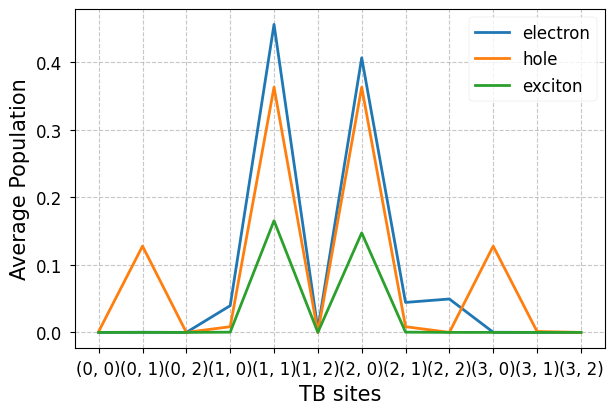

In [36]:
from qDNA import calc_average_pop

init_state = ('(1, 1)', '(1, 1)') # initial excitation in the middle of the upper strand
end_states = tb_ham.tb_basis

average_pop_e, average_pop_h, average_pop_ex = [], [], []
for end_state in end_states:
    average_pop = tb_ham.get_fourier(init_state, end_state, "average_pop")[2]
    average_pop_e.append(average_pop["electron"])
    average_pop_h.append(average_pop["hole"])
    average_pop_ex.append(average_pop["exciton"])

fig, ax = plt.subplots()

ax.plot(end_states, average_pop_e, label='electron')
ax.plot(end_states, average_pop_h, label='hole')
ax.plot(end_states, average_pop_ex, label='exciton')

ax.set_ylabel("Average Population")
ax.set_xlabel("TB sites")
ax.legend()

if save:
    save_figure(fig, 'avg_pop', SAVE_DIR, extension='pdf')
plt.show()

## Customised tight-binding model for light harvesting in the FMO complex

Image taken from: Quantum Dynamics of Bath Influenced Excitonic Energy Transfer in Photosynthetic Pigment-Protein Complexes, J.W. Abbott, University of Bristol, 2020. DOI: 10.5281/zenodo.7229807.


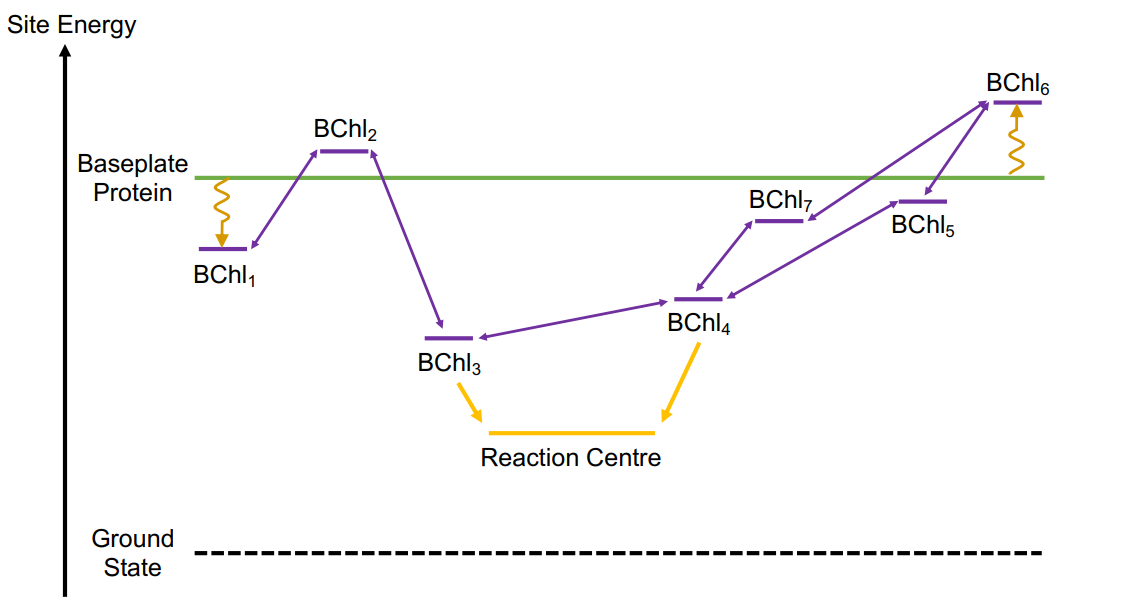

In [64]:
from IPython.display import Image

citation = "Quantum Dynamics of Bath Influenced Excitonic Energy Transfer in Photosynthetic Pigment-Protein Complexes, J.W. Abbott, University of Bristol, 2020. DOI: 10.5281/zenodo.7229807"
print(f"Image taken from: {citation}.")
Image(filename=os.path.join(FIG_DIR,'FMO_energy_level.png'), width=800)

The Fenna-Matthews-Olson (FMO) complex, a well-studied protein-pigment complex involved in photosynthesis. The FMO complex facilitates excitation energy transfer (EET) from the antenna complex to the reaction center in green sulfur bacteria.

In [81]:
from qDNA import Custom_TB_Model, get_tb_basis

tb_model_name = 'FMO_model'
num_strands = 1
tb_basis = get_tb_basis((1, 7))
tb_config = [('t', tb_basis[0], tb_basis[1]),
            ('t', tb_basis[1], tb_basis[2]),
            ('t', tb_basis[2], tb_basis[3]),
            ('t', tb_basis[3], tb_basis[4]),
            ('t', tb_basis[4], tb_basis[5]),
            ('t', tb_basis[5], tb_basis[6]),
            ('t', tb_basis[6], tb_basis[3]),
             ('E', tb_basis[0], tb_basis[0]),
             ('E', tb_basis[1], tb_basis[1]),
             ('E', tb_basis[2], tb_basis[2]),
             ('E', tb_basis[3], tb_basis[3]),
             ('E', tb_basis[4], tb_basis[4]),
             ('E', tb_basis[5], tb_basis[5]),
             ('E', tb_basis[6], tb_basis[6]),
            ]

tb_dims = ( num_strands, len(tb_basis)//num_strands )
tb_model = Custom_TB_Model(tb_model_name, tb_dims, tb_basis, tb_config)

In [89]:
from qDNA import save_json, load_json, tb_ham_1P, get_conversion

filename = "FMO_params"
tb_params = {'t_BChl1BChl2': -87.7, 't_BChl2BChl1': -87.7, 't_BChl2BChl3': 30.8, 't_BChl3BChl2': 30.8, 't_BChl3BChl4': -53.5,
            't_BChl4BChl3': -53.5, 't_BChl14Chl5': -70.7, 't_BChl5BChl4': -70.7, 't_BChl5BChl6': 81.1, 't_BChl6BChl5': 81.1,
            't_BChl6BChl7': 39.7, 't_BChl7BChl6': 39.7, 't_BChl7BChl4': -63.3, 't_BChl4BChl7': -63.3,
            'E_BChl1': 12410, 'E_BChl2': 12530, 'E_BChl3': 12210, 'E_BChl4': 12320, 'E_BChl5': 12480, 'E_BChl6': 12630, 'E_BChl7': 12440}
# all parameters are given in 1/cm 
conversion = get_conversion('1/cm', 'rad/ps')
tb_params = {key: value*conversion for key, value in tb_params.items()}

save_json(tb_params, {}, filename, DATA_DIR)
tb_params = load_json(filename, DATA_DIR)

In [90]:
tb_sites = ['BChl1', 'BChl2', 'BChl3', 'BChl4', 'BChl5', 'BChl6', 'BChl7']

tb_ham_matrix = tb_ham_1P(tb_model, tb_params, dict(zip(tb_basis, tb_sites)) )

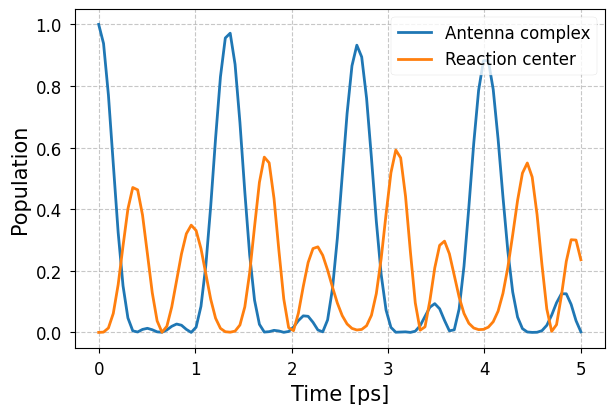

In [91]:
import qutip as q

result = q.mesolve(q.Qobj(tb_ham_matrix), q.fock_dm(7,0), np.linspace(0,5,100), [], e_ops=[q.fock_dm(7,0), q.fock_dm(7,2)])

fig, ax = plt.subplots()

ax.plot(result.times, result.expect[0], label="Antenna complex")
ax.plot(result.times, result.expect[1], label="Reaction center")

ax.legend()
ax.set_xlabel("Time [ps]")
ax.set_ylabel("Population")

if save:
    save_figure(fig, tb_model_name, SAVE_DIR, extension='pdf')
plt.show()